In [36]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
calls_df = pd.read_csv('calls.csv')

In [18]:
calls_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...
...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...


In [19]:
# Initial Data Inspection
print(calls_df.info())  # To check column types and null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
None


In [20]:
print(calls_df.describe())  # Summary statistics for numeric columns

            call_id   customer_id       agent_id
count  7.181000e+04  7.181000e+04   71810.000000
mean   4.993574e+09  5.004334e+09  564768.278039
std    2.889673e+09  2.884255e+09  257532.362167
min    1.316420e+05  1.197800e+04  102574.000000
25%    2.480013e+09  2.514618e+09  347606.000000
50%    4.989448e+09  4.999664e+09  591778.000000
75%    7.493629e+09  7.509126e+09  786323.000000
max    9.999806e+09  9.999935e+09  993862.000000


In [21]:
print(calls_df.isnull().sum())  # Check for null values

call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64


In [22]:
# Drop columns with a high number of nulls (if any)
calls_df_cleaned = calls_df.dropna(axis=1, thresh=int(0.6 * len(calls_df)))  # Keeping columns with 60% non-null values

In [23]:
# Drop rows with any null values (if needed)
calls_df_cleaned = calls_df_cleaned.dropna()

In [24]:
# Check cleaned dataset
print(calls_df_cleaned.isnull().sum())


call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64


In [25]:
# Convert datetime columns to datetime format
calls_df_cleaned['call_start_datetime'] = pd.to_datetime(calls_df_cleaned['call_start_datetime'])
calls_df_cleaned['call_end_datetime'] = pd.to_datetime(calls_df_cleaned['call_end_datetime'])

In [26]:
# Calculate call duration in seconds
calls_df_cleaned['call_duration'] = (calls_df_cleaned['call_end_datetime'] - calls_df_cleaned['call_start_datetime']).dt.total_seconds()


In [27]:
# Identify outliers using IQR (Interquartile Range)
Q1 = calls_df_cleaned['call_duration'].quantile(0.25)
Q3 = calls_df_cleaned['call_duration'].quantile(0.75)
IQR = Q3 - Q1

In [28]:
# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [29]:
# Remove outliers from the dataset
calls_df_no_outliers = calls_df_cleaned[(calls_df_cleaned['call_duration'] >= lower_bound) & (calls_df_cleaned['call_duration'] <= upper_bound)]


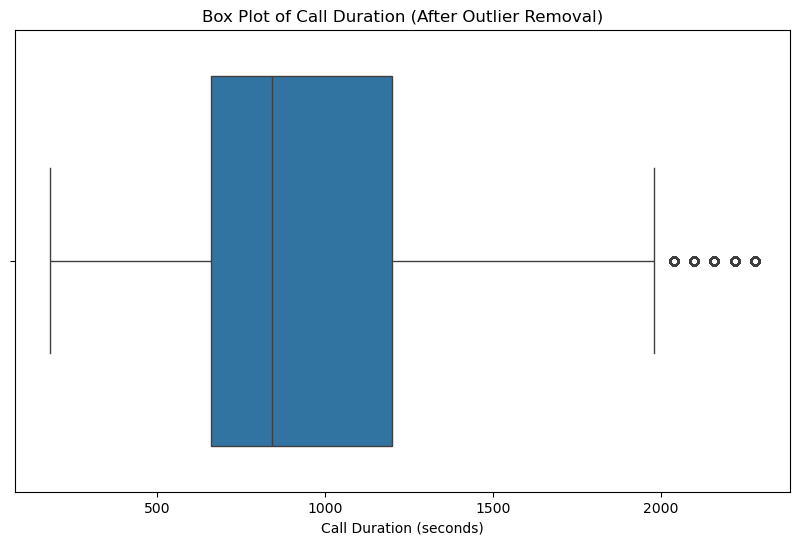

In [30]:
# Visualize with a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=calls_df_no_outliers['call_duration'])
plt.title('Box Plot of Call Duration (After Outlier Removal)')
plt.xlabel('Call Duration (seconds)')
plt.show()

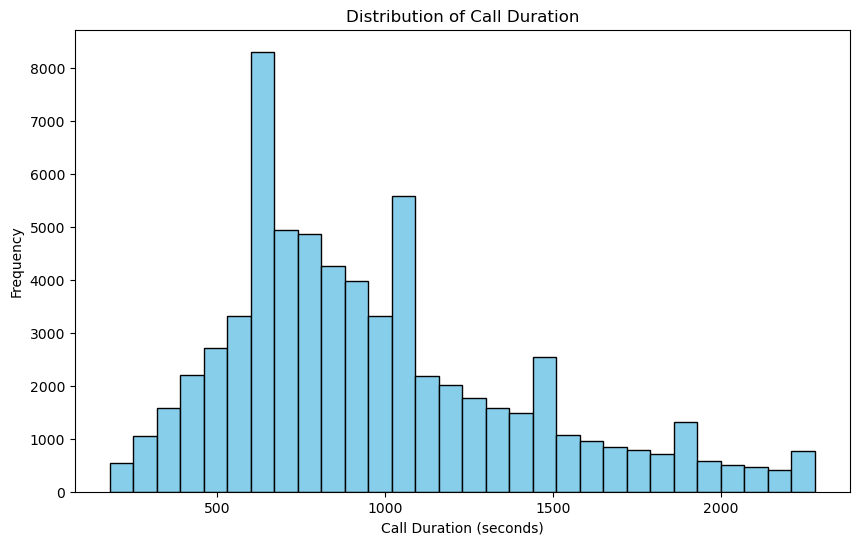

In [31]:
# Visualize the distribution of call duration using a histogram
plt.figure(figsize=(10, 6))
plt.hist(calls_df_no_outliers['call_duration'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


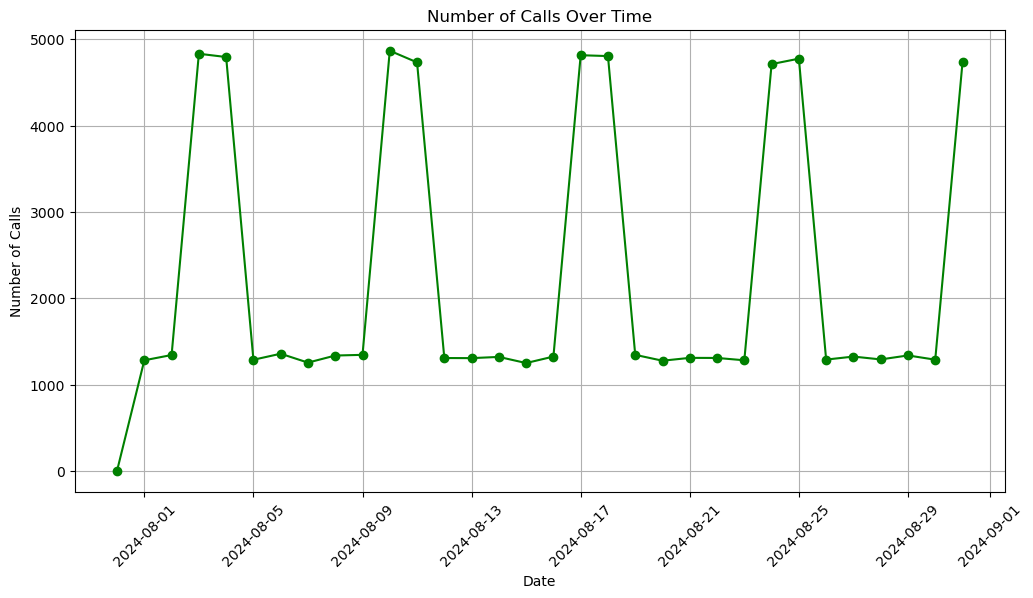

In [33]:
# Group by date to find the number of calls per day
calls_df_cleaned['call_date'] = calls_df_cleaned['call_start_datetime'].dt.date
calls_per_day = calls_df_cleaned.groupby('call_date').size()

# Plot the number of calls per day
plt.figure(figsize=(12, 6))
plt.plot(calls_per_day, marker='o', linestyle='-', color='green')
plt.title('Number of Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [35]:
# Bar plot to visualize calls handled by each agent
calls_by_agent = calls_df_cleaned['agent_id'].value_counts()

plt.figure(figsize=(192, 192))
sns.barplot(x=calls_by_agent.index, y=calls_by_agent.values, palette='viridis')
plt.title('Number of Calls Handled by Each Agent')
plt.xlabel('Agent ID')
plt.ylabel('Number of Calls')
plt.xticks(rotation=90)
plt.show()


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_18526/2812578226.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=calls_by_agent.index, y=calls_by_agent.values, palette='viridis')
